# House Price Prediction using Machine Learning

**Internship:** Prodigy Infotech  
**Track:** Machine Learning (ML)  
**Task:** ML Task 1 – Regression  
**Dataset:** Kaggle House Prices Dataset

**Objective:**  
Build a supervised machine learning regression model to predict house prices based on given features.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


In [ ]:
train_df = pd.read_csv(r"C:\Users\LENOVO\Downloads\PRODIGY_INFOTECH_INTERNSHIP\PRODIGY_ML_01\train.csv")
test_df = pd.read_csv(r"C:\Users\LENOVO\Downloads\PRODIGY_INFOTECH_INTERNSHIP\PRODIGY_ML_01\test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


In [ ]:
train_df.head()


In [ ]:
train_df.isnull().sum().sort_values(ascending=False).head(10)


In [ ]:
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

print(X.shape)
print(y.shape)


In [ ]:
combined = pd.concat([X, test_df], axis=0)

for col in combined.columns:
    if combined[col].dtype == "object":
        combined[col] = combined[col].fillna("Missing")
        le = LabelEncoder()
        combined[col] = le.fit_transform(combined[col])
    else:
        combined[col] = combined[col].fillna(combined[col].median())


In [ ]:
X = combined.iloc[:len(X), :]
test_processed = combined.iloc[len(X):, :]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_val.shape)


In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


In [ ]:
val_preds = model.predict(X_val)

mae = mean_absolute_error(y_val, val_preds)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print("MAE:", mae)
print("RMSE:", rmse)


In [ ]:
test_preds = model.predict(test_processed)

submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_preds
})

submission.head()


In [ ]:
submission.to_csv("submission.csv", index=False)
print("submission.csv file created")


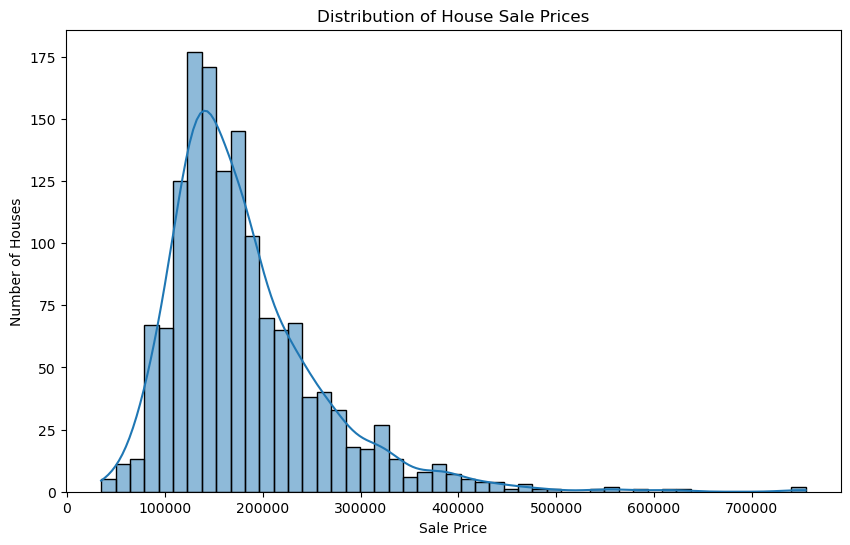

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: How house prices are spread out
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.show()


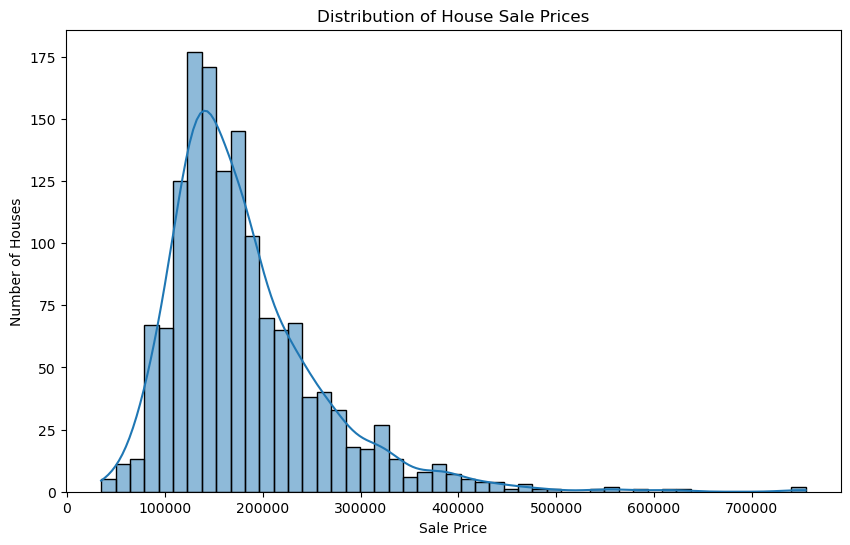

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: How house prices are spread out
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.show()


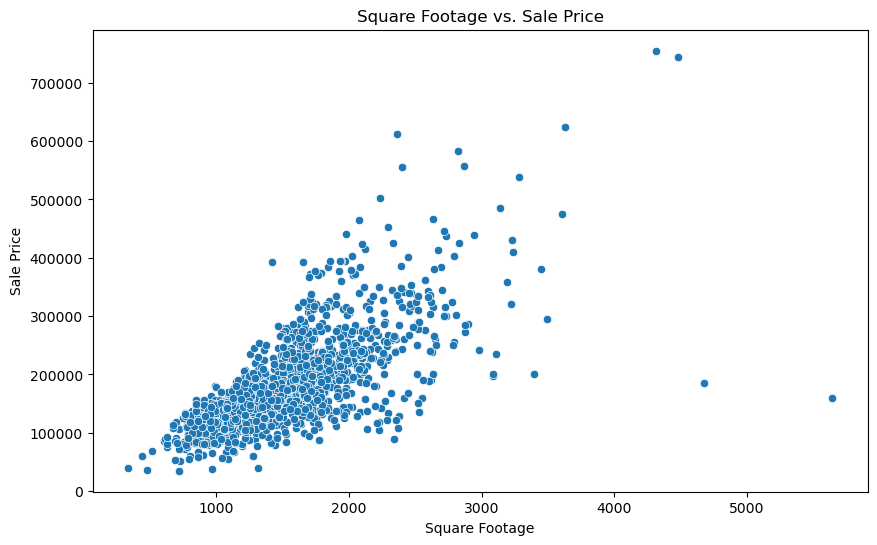

In [17]:
# Plot 2: Bigger houses = higher price?
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.title('Square Footage vs. Sale Price')
plt.xlabel('Square Footage')
plt.ylabel('Sale Price')
plt.show()


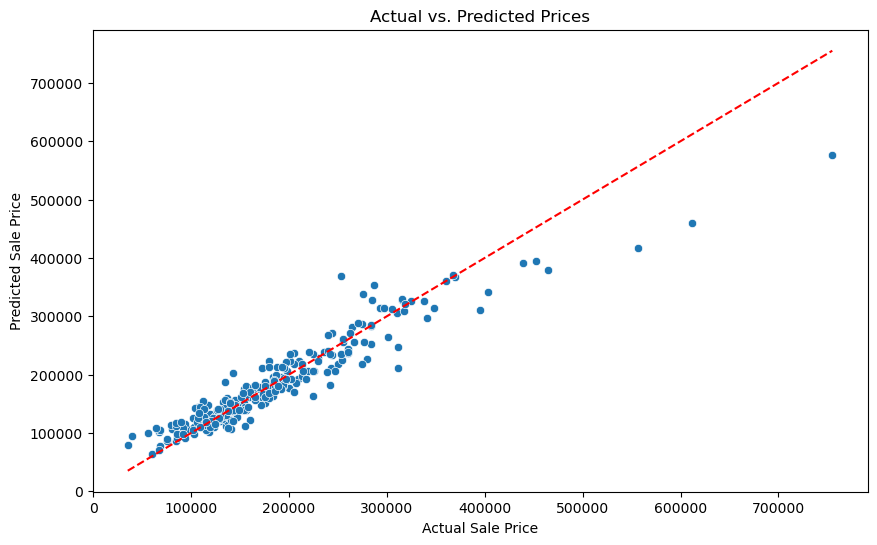

In [18]:
# Plot 3: How good is my model? (dots close to red line = good!)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=val_preds)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()
